In [1]:
### Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### Read CSV file & Future Formatting
df_data = pd.read_csv("data.csv")
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = "{:.2f}".format

# Identify unnecessary and target columns
DROP_LABELS = ["Flow ID", "Src IP", "Src Port", "Dst IP", "Dst Port", "Timestamp"]
TARGET_LABELS = ["Label", "Traffic Type", "Traffic Subtype"]

In [9]:
### Sampling
def sampling(df: pd.DataFrame, cap: int, rate: float) -> pd.DataFrame:
    print("Dataset before sampling & removing unecessary data, duplicates has", df.shape[0], "rows and", df.shape[1], "columns")
    print("Sampling ...")
    subtype_counts = df["Traffic Subtype"].value_counts()  # All the traffic subtypes
    subtypes_sampling = subtype_counts[subtype_counts > cap].index    # All the traffic subtypes with over 10000 rows
    subtypes_nosampling = subtype_counts[subtype_counts <= cap].index # All the traffic subtypes with under 10000 rows

    df_sampling = df[df["Traffic Subtype"].isin(subtypes_sampling)]   # DataFrame with all the oversized traffic subtypes
    df_sampled = df_sampling.sample(frac=rate)  # Sampled DataFrame for oversized traffic types
    df_notsampled = df[df["Traffic Subtype"].isin(subtypes_nosampling)]   # DataFrame for rest of traffic types
    df_formatted =  pd.concat([df_sampled, df_notsampled], ignore_index=True)  # Final  partially sampled DataFrame

    print("Removing unnecessary data and duplicates ...")
    df_final = df_formatted.drop(columns=DROP_LABELS)
    df_final =  df_final.drop_duplicates()
    print("Dataset after sampling & removing unecessary data, duplicates has", df_final.shape[0], "rows and", df_final.shape[1], "columns")
    
    return df_final


In [10]:
### Data introduction

# Drop unnecessary columns and present data
def present(df: pd.DataFrame) -> pd.DataFrame:
    display(df.head())
    display(df.tail())
    display(df.describe().T)
    display(df.groupby(TARGET_LABELS).size().reset_index(name="Counts"))

    return df

In [87]:
### Correlation, target correlation and intresting columns
def correlation(df: pd.DataFrame, target=False):
    if target == True:
        plot_labels = []
        new_df = pd.get_dummies(df, columns=["Label"], dtype=int)
        cor = new_df.corr(numeric_only=True).filter(["Label_Malicious"])
        cor.rename(columns={"Label_Malicious": "Malicious"}, inplace=True)
        cor.rename(index={"Label_Malicious": "Malicious", "Label_Benign": "Benign"}, inplace=True)

        for r in cor.index.tolist():
            if abs(cor.at[r, "Malicious"]) > 0.25 and r != "Benign" and r != "Malicious":
                plot_labels.append(r)

        print(len(plot_labels), "Metrics with high correlation with target")
        return cor, plot_labels

    else:
        new_df = pd.get_dummies(df, columns=["Label"], dtype=int)
        new_df.rename(columns={"Label_Malicious": "Malicious", "Label_Benign": "Benign"}, inplace=True)
        return new_df.corr(numeric_only=True)

In [94]:
### Data Visualization
# Create heatmap from correlation Pandas Dataframe
def heatmap(corr: pd.DataFrame, title: str) -> None:
    print("Generating heatmap ...")
    plt.figure(figsize=(30, 20))
    sns.heatmap(corr, cmap="coolwarm", square=True)
    plt.title(title)
    plt.show()

# Create boxplot diagram to showcase target differences
def boxplot(df: pd.DataFrame, title: str, y_lim_bot: float, y_lim_top: float) -> None:
    print("Generating boxplot ...")
    plt.figure(figsize=(15, 5))
    sns.boxplot(data=df)
    plt.ylim((y_lim_bot, y_lim_top))
    plt.xticks(rotation = 65, ha = "right", fontsize=8)
    plt.title(title)
    plt.show()

# Create barplot to showcase certain values
def barplot(x, y, title: str) -> None:
    print("Generating barplot ...")
    plt.figure(figsize=(15, 5))
    sns.barplot(x=x, y=y)
    plt.ylim((-1, 1))
    plt.xticks(rotation = 65, ha = "right", fontsize=8)
    plt.title(title)
    plt.grid(True, axis="y")
    plt.show()

In [26]:
### Sampling, remove excess metrics and duplicates, present data
df_sampled = sampling(df_data, cap=10000, rate=0.01)
df = present(df_sampled)

Dataset before sampling & removing unecessary data, duplicates has 8656767 rows and 86 columns
Sampling ...
Removing unnecessary data and duplicates ...
Dataset after sampling & removing unecessary data, duplicates has 118125 rows and 80 columns


,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Traffic Type,Traffic Subtype
0,6.00,30141.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,66.35,30141.00,0.00,30141.00,30141.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,20.00,20.00,33.18,33.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,512.00,0.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Malicious,Information Gathering,Information Gathering
1,17.00,18027253.00,3.00,0.00,1500.00,0.00,500.00,500.00,500.00,0.00,0.00,0.00,0.00,0.00,83.21,0.17,9013626.50,8548326.31,15058206.00,2969047.00,18027253.00,9013626.50,8548326.31,15058206.00,2969047.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,24.00,0.00,0.17,0.00,500.00,500.00,500.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,666.67,500.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,750.00,0.00,0.00,0.00,0.00,2.00,8.00,0.00,0.00,0.00,0.00,15058206.00,0.00,15058206.00,15058206.00,Malicious,DoS,DoS UDP
2,6.00,22336536.00,3.00,0.00,130.00,0.00,50.00,30.00,43.33,11.55,0.00,0.00,0.00,0.00,5.82,0.13,11168268.00,1347472.58,12121075.00,10215461.00,22336536.00,11168268.00,1347472.58,12121075.00,10215461.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,80.00,0.00,0.13,0.00,30.00,50.00,40.00,11.55,133.33,0.00,0.00,0.00,0.00,0.00,3.00,0.00,0.00,0.00,53.33,43.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,65.00,0.00,0.00,512.00,0.00,2.00,20.00,0.00,0.00,0.00,0.00,11168268.00,1347472.58,12121075.00,10215461.00,Malicious,DoS,DoS URG
3,6.00,10799229.00,2.00,0.00,80.00,0.00,50.00,30.00,40.00,14.14,0.00,0.00,0.00,0.00,7.41,0.19,10799229.00,0.00,10799229.00,10799229.00,10799229.00,10799229.00,0.00,10799229.00,10799229.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,60.00,0.00,0.19,0.00,30.00,50.00,36.67,11.55,133.33,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,55.00,40.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,80.00,0.00,0.00,512.00,0.00,1.00,20.00,0.00,0.00,0.00,0.00,10799229.00,0.00,10799229.00,10799229.00,Malicious,DoS,DoS SYN
4,6.00,21157.00,1.00,1.00,50.00,0.00,50.00,50.00,50.00,0.00,0.00,0.00,0.00,0.00,2363.28,94.53,21157.00,0.00,21157.00,21157.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,20.00,47.27,47.27,0.00,50.00,33.33,28.87,833.33,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,1.00,50.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,512.00,0.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Malicious,DoS,DoS ECN


,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Traffic Type,Traffic Subtype
122132,17.00,22485411.00,2307.00,0.00,3036012.00,0.00,1316.00,1316.00,1316.00,0.00,0.00,0.00,0.00,0.00,135021.41,102.60,9750.83,2943.43,34364.00,30.00,22485411.00,9750.83,2943.43,34364.00,30.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18456.00,0.00,102.60,0.00,1316.00,1316.00,1316.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1316.57,1316.00,0.00,0.00,0.00,0.00,3036012.00,2307.00,135021.00,0.00,0.00,0.00,0.00,0.00,0.00,2306.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Benign,Video,Video UDP
122133,0.00,65027682.00,9.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,8128460.25,13829860.15,38099180.00,403.00,65027682.00,8128460.25,13829860.15,38099180.00,403.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3586913.00,0.00,3586913.00,3586913.00,28925934.50,12972928.20,38099180.00,19752689.00,Benign,Video,Video UDP
122134,17.00,49795393.00,5256.00,0.00,6916896.00,0.00,1316.00,1316.00,1316.00,0.00,0.00,0.00,0.00,0.00,138906.34,105.55,9475.81,46833.33,482563.00,0.00,49795393.00,9475.81,46833.33,482563.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,42048.00,0.00,105.55,0.00,1316.00,1316.00,1316.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1316.25,1316.00,0.00,0.00,0.00,0.00,6916896.00,5256.00,138906.00,0.00,0.00,0.00,0.00,0.00,0.00,5255.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Benign,Video,Video UDP
122135,17.00,8809176.00,596.00,0.00,784336.00,0.00,1316.00,1316.00,1316.00,0.00,0.00,0.00,0.00,0.00,89036.25,67.66,14805.34,62796.18,773425.00,0.00,8809176.00,14805.34,62796.18,773425.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4768.00,0.00,67.66,0.00,1316.00,1316.00,1316.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1318.21,1316.00,0.00,0.00,0.00,0.00,784336.00,596.00,89036.00,0.00,0.00,0.00,0.00,0.00,0.00,595.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Benign,Video,Video UDP
122136,17.00,2856556.00,477.00,0.00,627732.00,0.00,1316.00,1316.00,1316.00,0.00,0.00,0.00,0.00,0.00,219751.34,166.98,6001.17,3897.52,25978.00,17.00,2856556.00,6001.17,3897.52,25978.00,17.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3816.00,0.00,166.98,0.00,1316.00,1316.00,1316.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1318.76,1316.00,0.00,0.00,0.00,0.00,627732.00,477.00,219751.00,0.00,0.00,0.00,0.00,0.00,0.00,476.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Benign,Video,Video UDP


,count,mean,std,min,25%,50%,75%,max
Protocol,118125.00,6.37,2.03,0.00,6.00,6.00,6.00,17.00
Flow Duration,118125.00,8878259.24,13847480.50,1.00,48876.00,2753030.00,12068895.00,119999554.00
Total Fwd Packet,118125.00,31.95,1607.13,1.00,1.00,2.00,3.00,363356.00
Total Bwd packets,118125.00,19.19,866.85,0.00,0.00,1.00,1.00,216394.00
Total Length of Fwd Packet,118125.00,13472.42,372074.49,0.00,27.00,100.00,890.00,27879460.00
Total Length of Bwd Packet,118125.00,10199.12,240147.47,0.00,0.00,0.00,0.00,23507320.00
Fwd Packet Length Max,118125.00,257.62,364.42,0.00,13.00,50.00,500.00,1368.00
Fwd Packet Length Min,118125.00,224.33,347.37,0.00,0.00,50.00,500.00,1368.00
Fwd Packet Length Mean,118125.00,232.57,347.10,0.00,3.00,50.00,500.00,1368.00
Fwd Packet Length Std,118125.00,11.59,55.86,0.00,0.00,0.00,0.00,953.18


,Label,Traffic Type,Traffic Subtype,Counts
0,Benign,Audio,Audio,190
1,Benign,Background,Background,32
2,Benign,Text,Text,209
3,Benign,Video,Video HTTP,364
4,Benign,Video,Video RTP,349
5,Benign,Video,Video UDP,145
6,Malicious,Bruteforce,Bruteforce DNS,222
7,Malicious,Bruteforce,Bruteforce FTP,3485
8,Malicious,Bruteforce,Bruteforce HTTP,628
9,Malicious,Bruteforce,Bruteforce SSH,3927


Generating boxplot ...


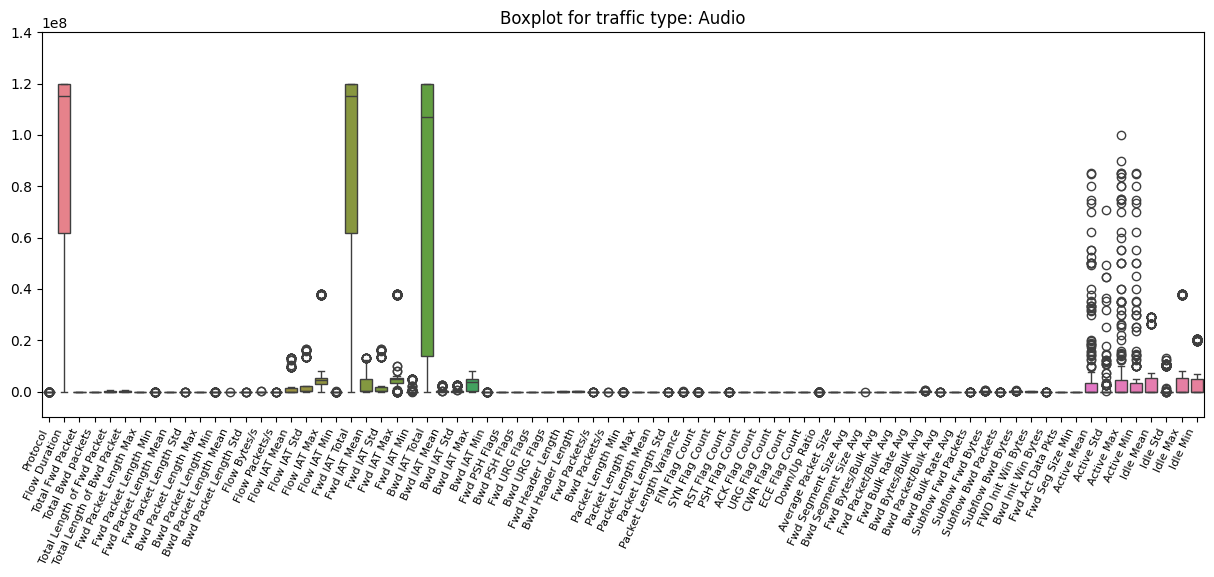

Generating boxplot ...


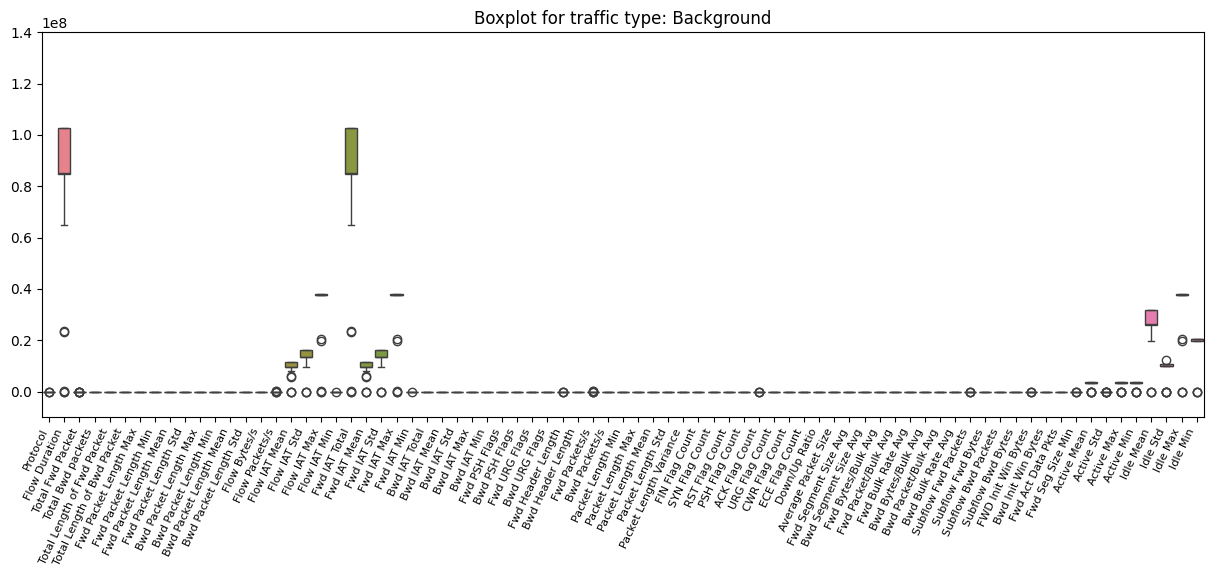

Generating boxplot ...


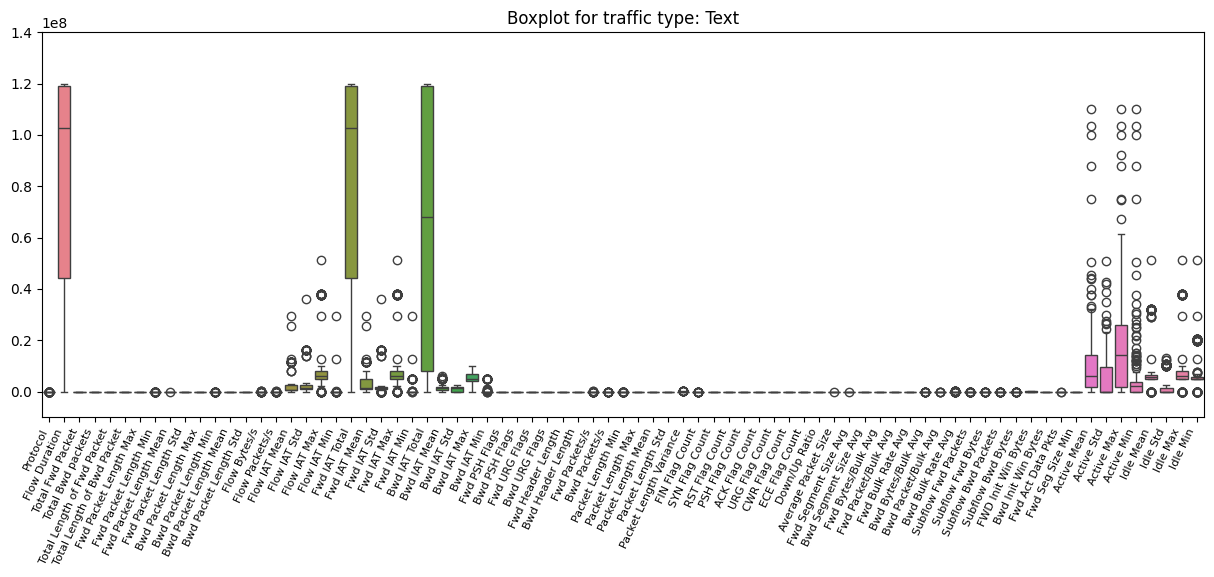

Generating boxplot ...


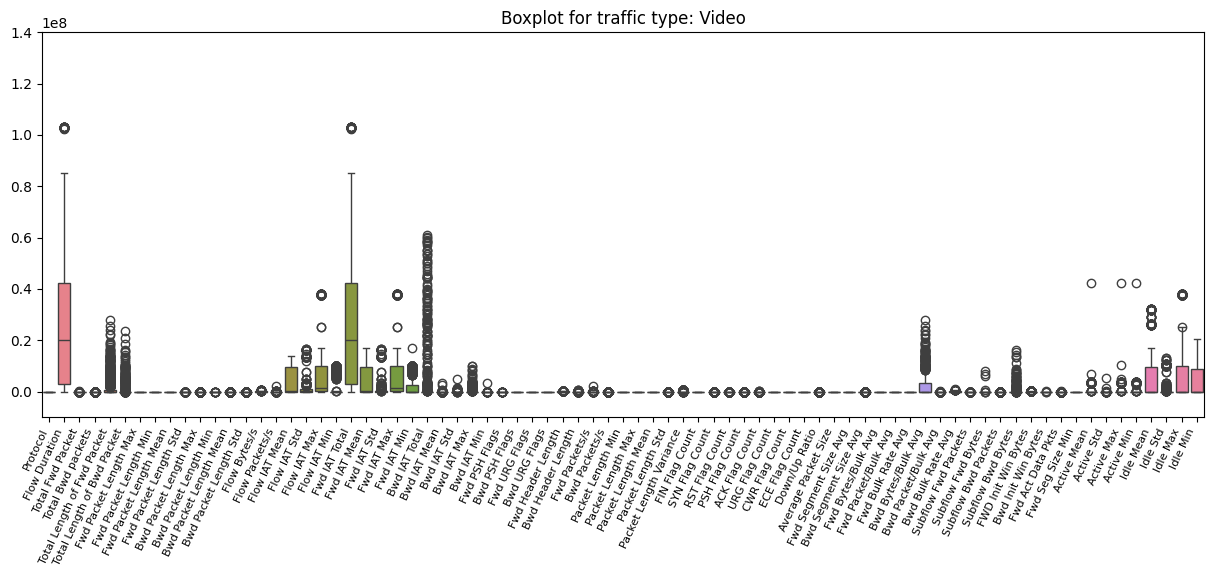

Generating boxplot ...


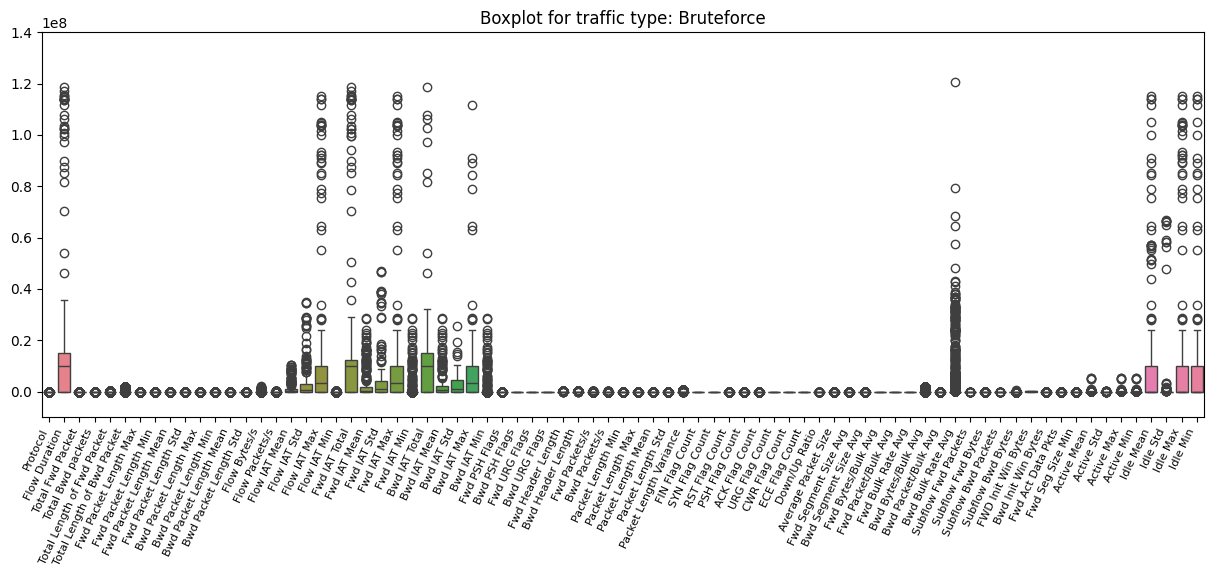

Generating boxplot ...


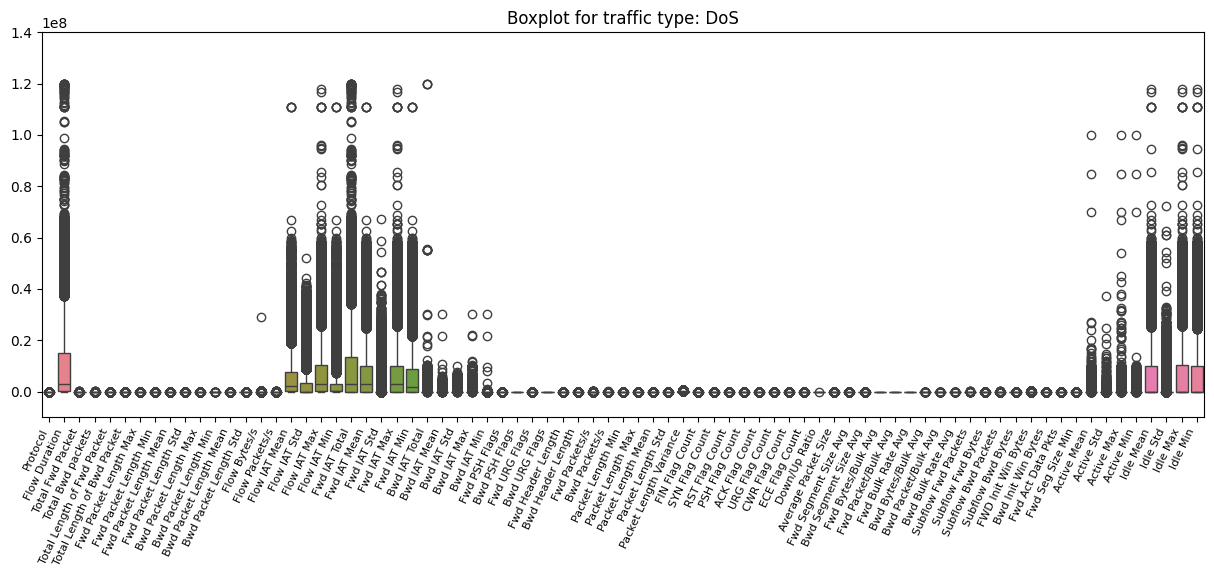

Generating boxplot ...


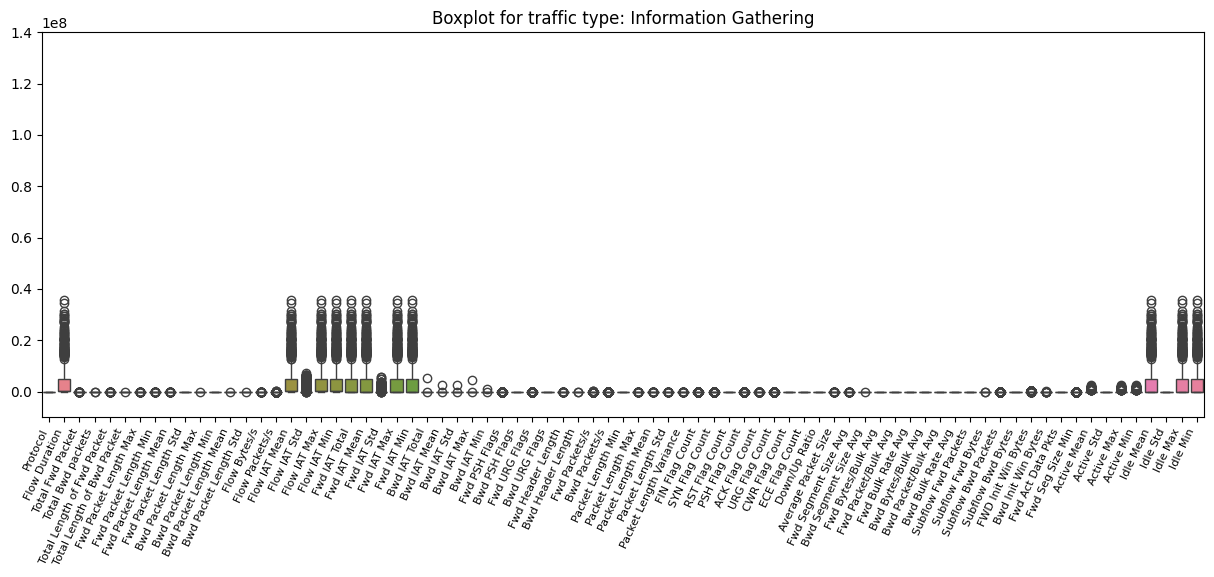

Generating boxplot ...


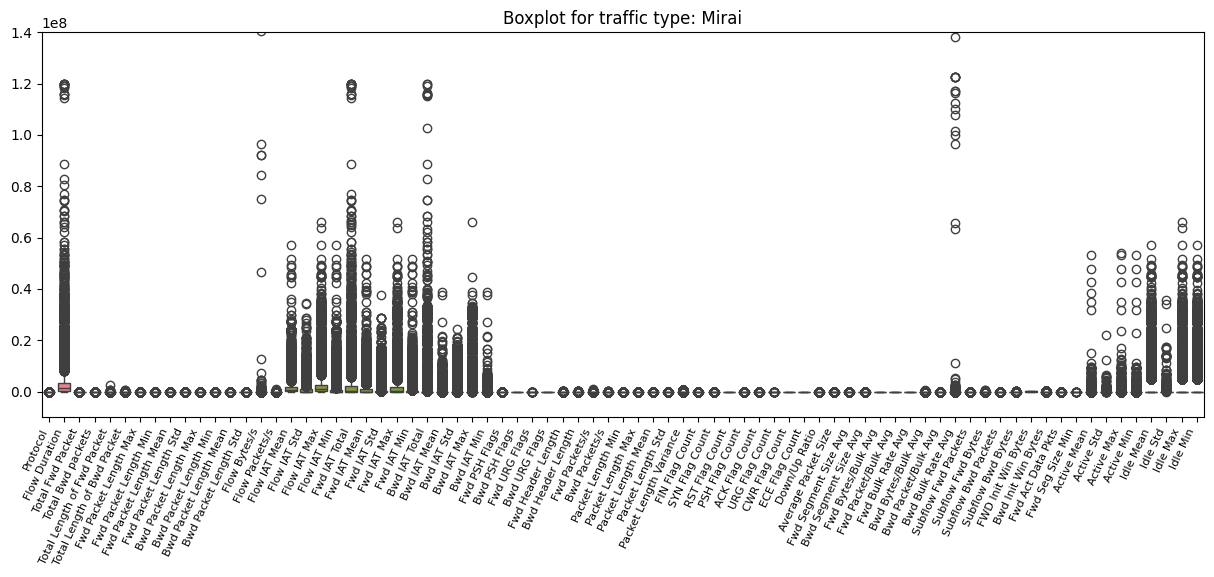

Generating boxplot ...


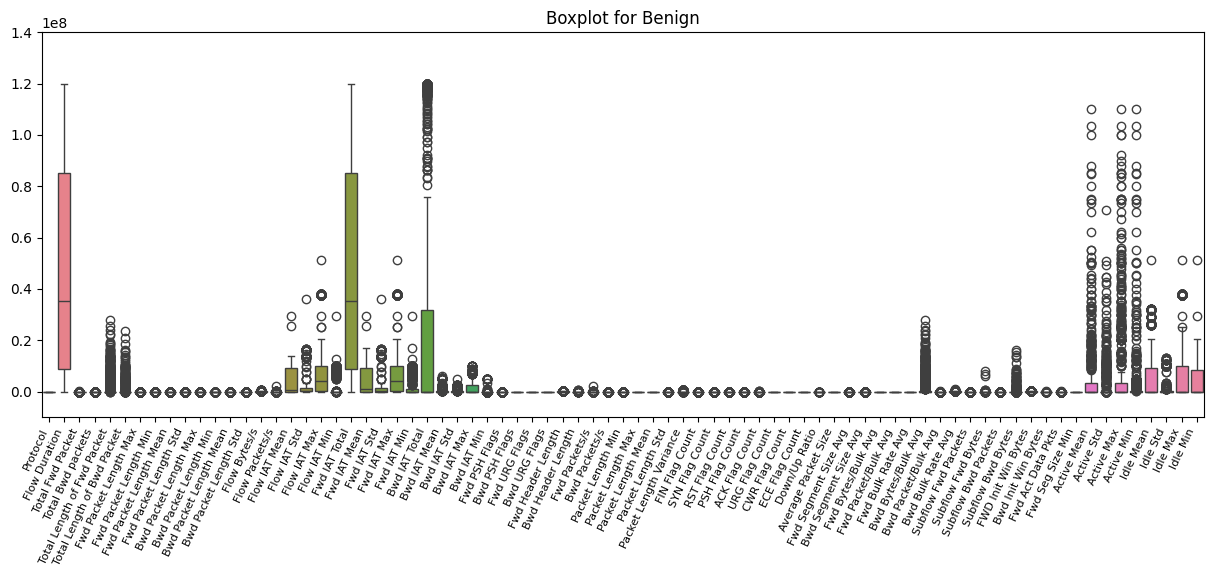

Generating boxplot ...


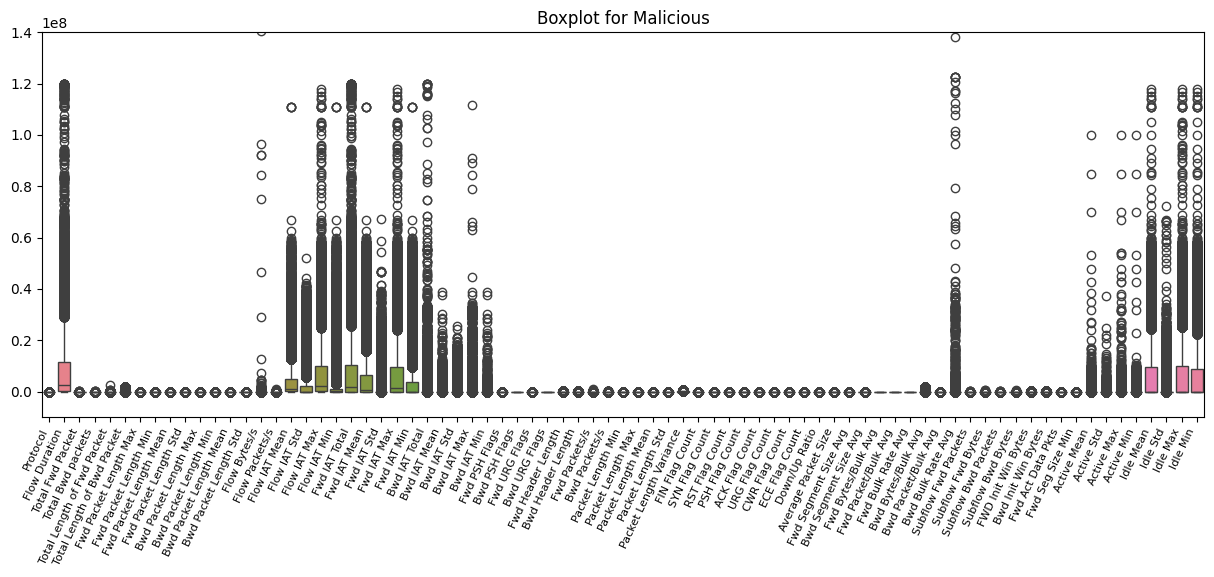

In [ ]:
### Present distributions for all metrics for both Benign and Malicious labels
ylim_top = 1.4 * 1e8
ylim_bot = -0.1 * 1e8
df_benign = df[df["Label"] == "Benign"]
df_malicious = df[df["Label"] == "Malicious"]

benign_list = ["Audio", "Background", "Text", "Video"]
malicious_list = ["Bruteforce", "DoS", "Information Gathering", "Mirai"]

for ttype in benign_list:
    boxplot(df_benign[df_benign["Traffic Type"] == ttype].drop(columns=TARGET_LABELS), "Boxplot for traffic type: " + ttype, ylim_bot, ylim_top)

for ttype in malicious_list:
    boxplot(df_malicious[df_malicious["Traffic Type"] == ttype].drop(columns=TARGET_LABELS), "Boxplot for traffic type: " + ttype, ylim_bot, ylim_top)

boxplot(df_benign.drop(columns=TARGET_LABELS), "Boxplot for Benign", ylim_bot, ylim_top)
boxplot(df_malicious.drop(columns=TARGET_LABELS), "Boxplot for Malicious", ylim_bot, ylim_top)

In [89]:
# Compute correlations
cor1 = correlation(df)
cor2, important_labels = correlation(df, target=True)
print(important_labels)

11 Metrics with high correlation with target
['Flow Duration', 'Total Length of Fwd Packet', 'Fwd IAT Total', 'Bwd IAT Total', 'Fwd Header Length', 'Bwd Header Length', 'PSH Flag Count', 'ACK Flag Count', 'Bwd Bytes/Bulk Avg', 'Bwd Packet/Bulk Avg', 'Fwd Act Data Pkts']


Generating heatmap ...


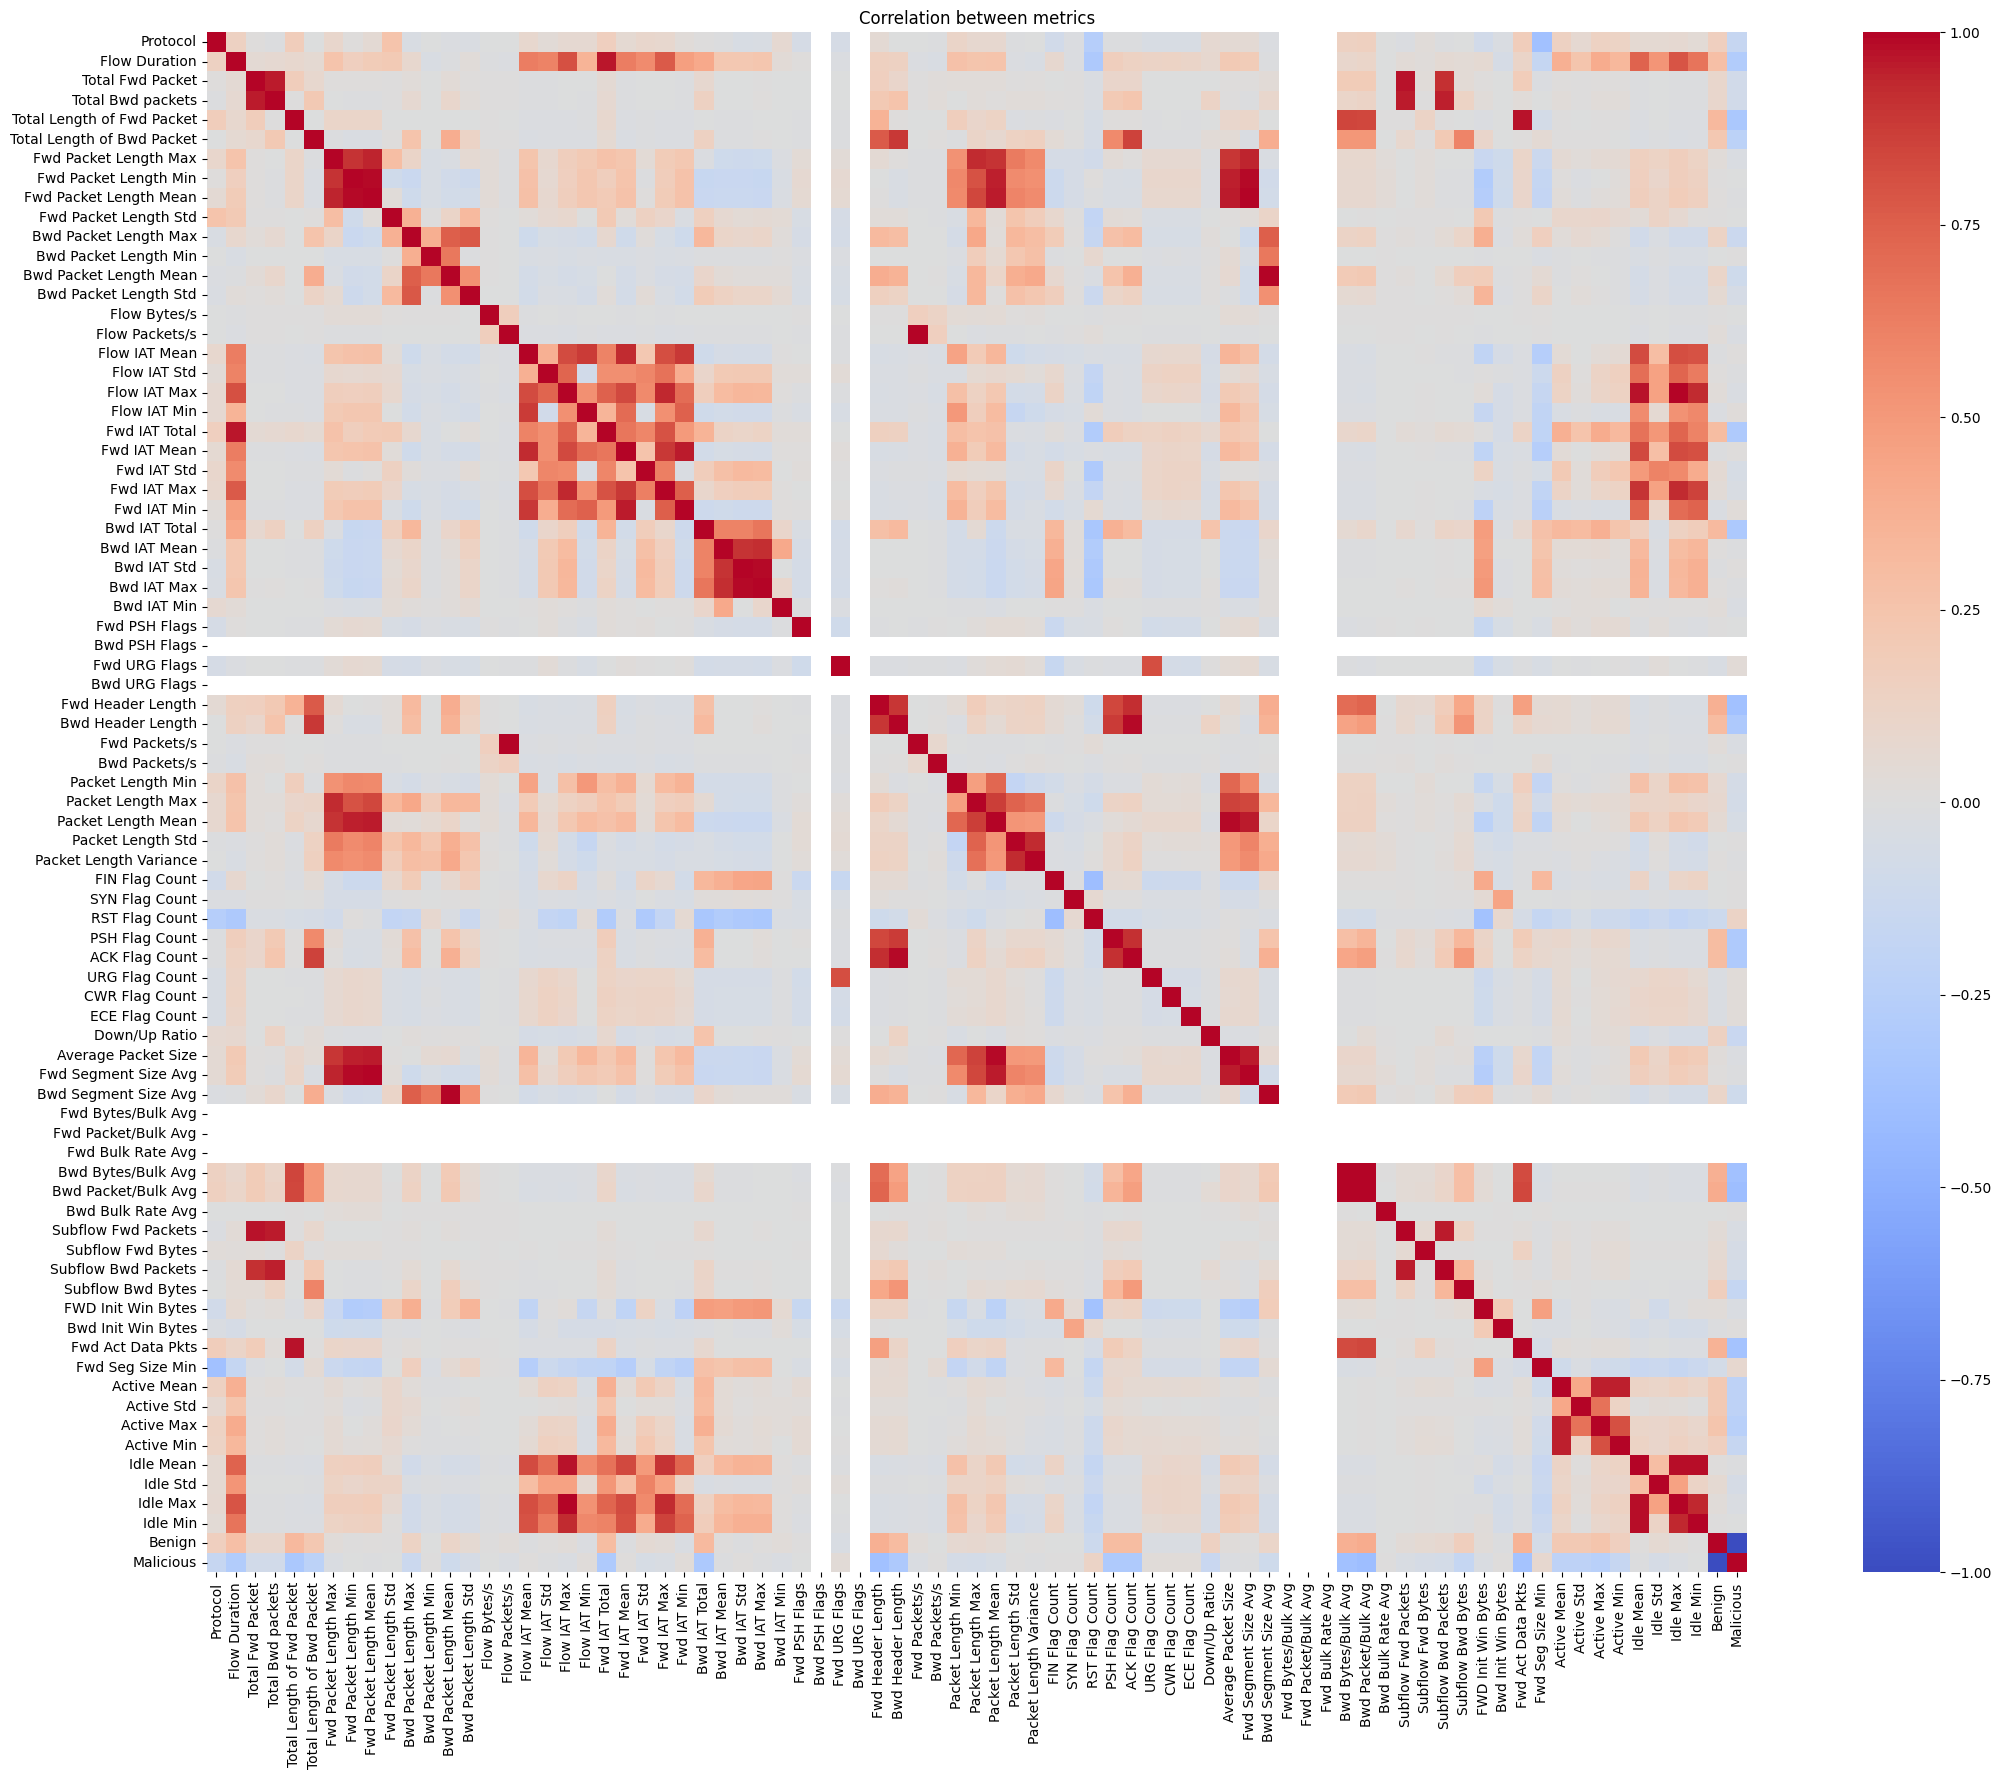

Generating heatmap ...


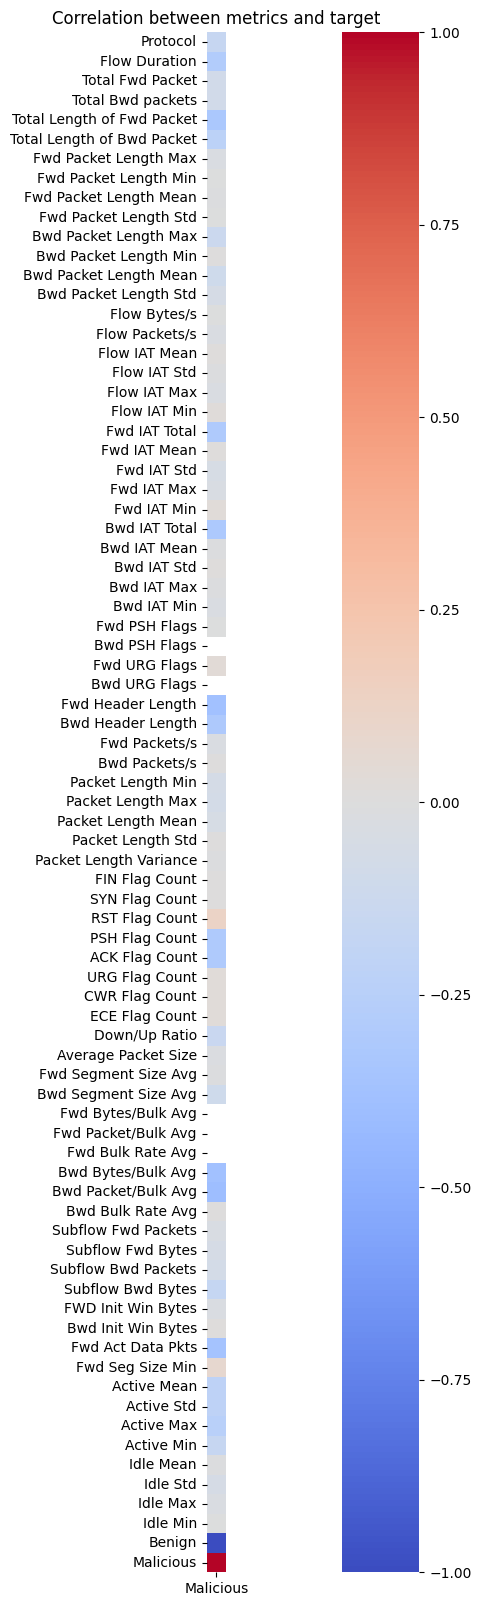

In [61]:
### Create heatmaps
heatmap(cor1, "Correlation between metrics")
heatmap(cor2, "Correlation between metrics and target")

Generating barplot ...


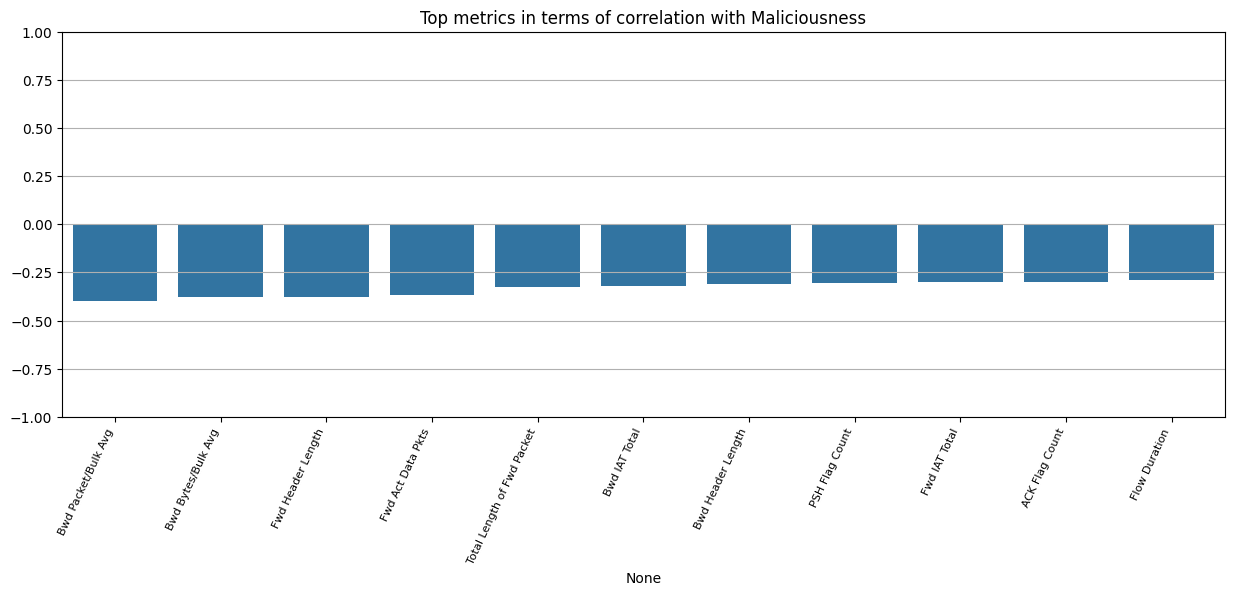

In [95]:
### Showcase top correlations
df_important_cor_count = cor2.filter(items=important_labels, axis="index").sort_values(by="Malicious")
barplot(
    df_important_cor_count.index, df_important_cor_count.values.reshape(len(df_important_cor_count.index)),
    "Top metrics in terms of correlation with Maliciousness"
)